In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df=pd.read_csv('Obesity.csv',sep=',',encoding='latin1')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   int32  
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(7), int32(1), object(9

In [3]:
df.shape

(2111, 17)

In [7]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
#Arrendondando os valores das colunas 
df['FCVC']=df['FCVC'].round()
df['NCP']=df['NCP'].round()
df['CH2O']=df['CH2O'].round()
df['FAF']=df['FAF'].round()
df['TUE']=df['TUE'].round()
df['Age']=df['Age'].astype('int')
df['Height']=df['Height'].map(lambda x : f'{x:.2f}').astype('float')
df['Weight']=df['Weight'].map(lambda x : f'{x:.2f}').astype('float')

In [ ]:
#Verificar se existem valores nulos

df.isna().sum().sum()

0

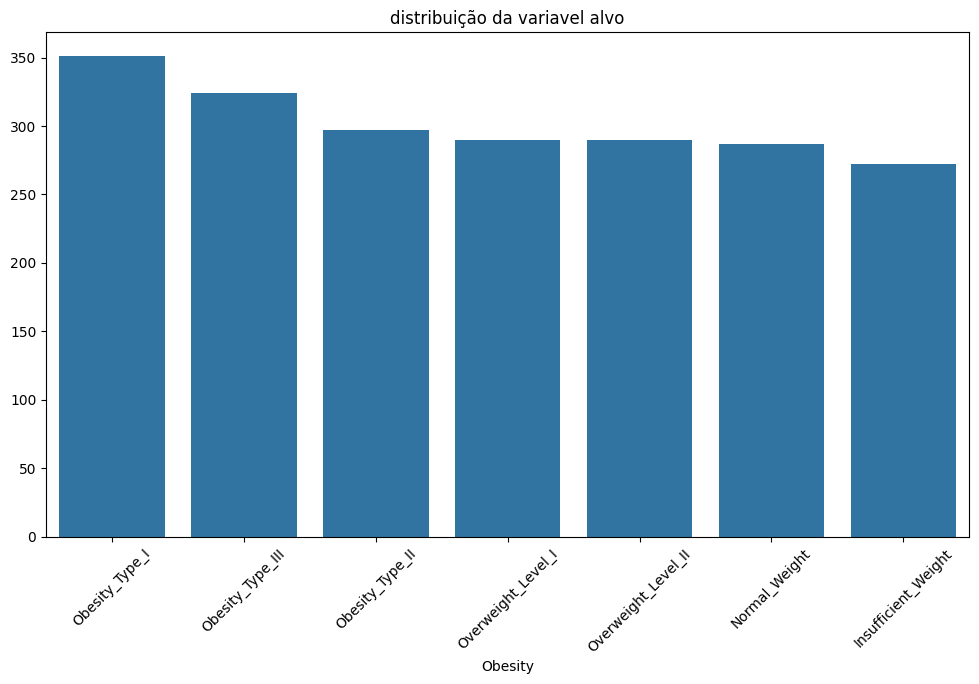

In [38]:
plt.figure(figsize=(10,6))

sns.barplot(x=df['Obesity'].value_counts().index,y=df['Obesity'].value_counts().values)
plt.title("distribuição da variavel alvo")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
x=df['Obesity'].value_counts(normalize=True)*100

Obesity
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64

In [47]:
variaveis_categoricas=df.select_dtypes(['object']).columns

In [48]:
variaveis_categoricas

Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS', 'Obesity'],
      dtype='object')

In [52]:
#Codificando variaveis categoricas
le=LabelEncoder()
df[variaveis_categoricas]=df[variaveis_categoricas].apply(lambda x:le.fit_transform(x))

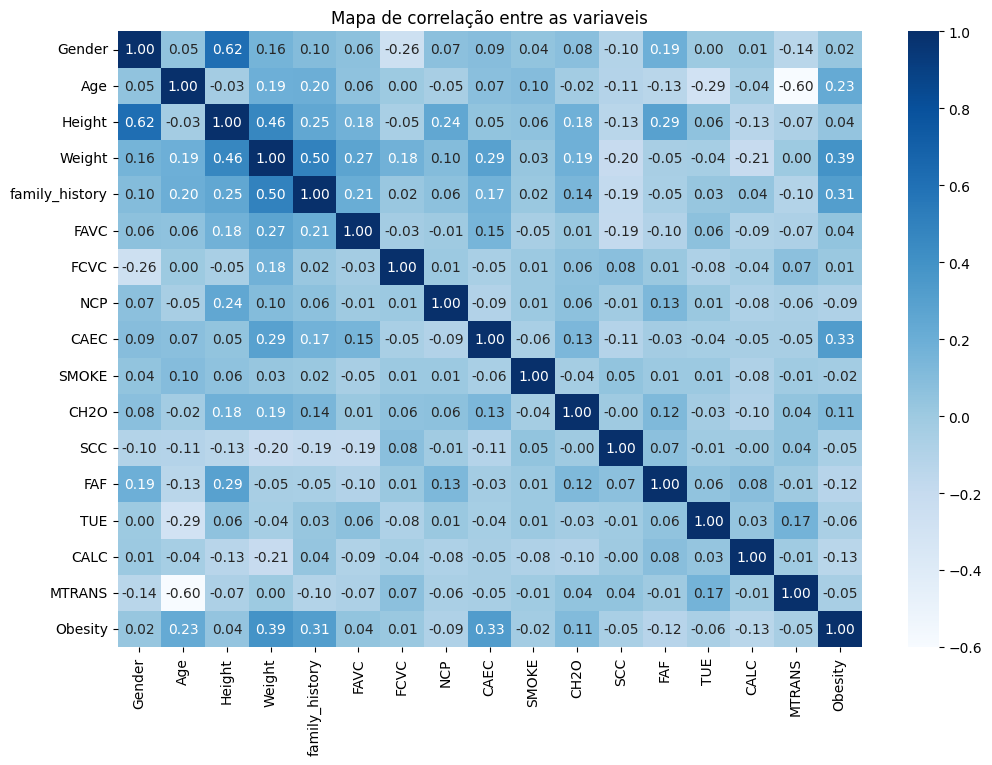

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f')
plt.title("Mapa de correlação entre as variaveis")
plt.show()